# Unveiling Insights: A Journey Through Online Retail Transactions

## **Introduction**

Every data project begins with a question. It sounds simple, even obvious, yet many aspiring data professionals fall into the trap of diving headfirst into the data—cleaning, filtering, and visualizing—without first defining the problem they want to solve. A true professional, however, approaches data with curiosity and structure, always starting with a well-defined question.

This project is designed not just as an analysis but as a guided journey. Whether you're an HR manager evaluating my analytical skills or an aspiring data scientist looking to learn alongside me, this project aims to be both informative and engaging.

## **About the Dataset**

The dataset we will explore consists of **over 500,000 transactions** from an online retail store, spanning from **December 2010 to December 2011**. It provides detailed information about customer purchases, including:

- **Invoice numbers** (to track unique transactions)
- **Stock codes and product descriptions** (to identify items sold)
- **Quantities and unit prices** (to calculate revenue and sales trends)
- **Timestamps** (to analyze seasonal patterns and shopping behaviors)
- **Customer IDs** (to explore customer retention and segmentation)
- **Geographical data** (to uncover purchasing trends across different countries)

This dataset presents a fantastic opportunity to **extract meaningful insights, visualize trends, and tell compelling data-driven stories**. Through this project, we will answer key business questions such as:


1. Which countries contribute the most to total revenue?
2. Are there seasonal trends that influence customer spending?
3. Can we identify loyal customers and their purchasing behaviors?
4. What are the most popular products, and how do their sales fluctuate over time?

We will answer questions 1 and 2 in this notebook and for the question 3-4 (which will involve unsupervised machine learning) we will use a different notebook. 

Through **descriptive visualizations and storytelling**, this analysis will go beyond mere numbers. Instead, it will uncover the hidden patterns behind online retail transactions, making data both accessible and insightful.

Let’s dive in and explore the data together!



In [1]:
# python3 -m venv data_analysis_env
!source data_analysis_env/bin/activate
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


# Set seaborn style and color palette
sns.set_style("darkgrid")  
sns.set_palette(sns.color_palette("Spectral"))

# Load the data
df = pd.read_csv('data/online_retail.csv')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


## **Data Cleaning and Preparation**

The first step in our journey is to clean the data and remove outliers. Above, we examined the general structure of the dataset using `df.info()`, and we observed missing values in the `CustomerID` and `Description` columns. 

To address these issues:
- **CustomerID:** Missing values likely indicate guest checkouts. We will assign a placeholder flag to these missing values to distinguish them from registered users.
- **Description:** We will fill missing values using existing descriptions based on `StockCode`. Any objects with no description will be removed as their impact on the dataset is negligible.

### **Further Examination of the Data**

To optimize our dataset for analysis, we will:
- **Remove the `index` column** as it is not necessary.
- **Utilize `InvoiceDate`** for examining sales trends over time.
- **Convert columns to the correct formats:**
  - `InvoiceDate`: **object** → **datetime64** (Allows time-series analysis)
  - `CustomerID`: **float64** → **Int64** (IDs should be integers but allow NaN)
  - `InvoiceNo`: **object** → **category** (Optimizes memory for repeated values)
  - `StockCode`: **object** → **category** (Optimizes memory for repeated values)

With our data cleaned and formatted correctly, we can now move on to uncovering meaningful insights through descriptive analysis and visualization.



In [4]:
# ! TODO: Add documentation in jupyter notebook about .transform and forward and backward fill
# Handle missing CustomerID (guest checkouts)
df["CustomerID"] = df["CustomerID"].fillna(-1)
df["CustomerID"] = df["CustomerID"].astype("Int64")

# Fill missing Description using StockCode mode
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())
df['Description'] = df['Description'].astype("string")

df.dropna(subset=["Description"], inplace=True)

# Remove unnecessary index column
if "index" in df.columns:
    df.drop(columns=["index"], inplace=True)

# Convert data types
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Ensure datetime format
df["InvoiceNo"] = df["InvoiceNo"].astype("category")  # Optimize memory
df["StockCode"] = df["StockCode"].astype("category")

# Display cleaned DataFrame info
df.info()

# save the cleaned data
df.to_csv('data/online_retail_clean.csv', index=False)

# Note how we descreased the memory usage from 37.2+ MB to 32.9+ MB

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_6738/3764578524.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())


<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  category      
 1   StockCode    541797 non-null  category      
 2   Description  541797 non-null  string        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   541797 non-null  Int64         
 7   Country      541797 non-null  object        
dtypes: Int64(1), category(2), datetime64[ns](1), float64(1), int64(1), object(1), string(1)
memory usage: 32.9+ MB


In [5]:
# Extract 'Month' as a Period (YYYY-MM) from 'InvoiceDate'
df["Month"] = df["InvoiceDate"].dt.to_period("M")

# Compute Monthly Sales and Revenue Trends
monthly_sales = df.groupby("Month")["Quantity"].sum()
df["TotalRevenue"] = df["Quantity"] * df["UnitPrice"]
monthly_revenue = df.groupby("Month")["TotalRevenue"].sum()

# Compute Monthly Returns Trend
monthly_returns = df[df["Quantity"] < 0].groupby("Month")["Quantity"].sum()

# Exclude the most recent (possibly incomplete) month
latest_month = df["Month"].max()
monthly_sales = monthly_sales.loc[monthly_sales.index != latest_month]
monthly_revenue = monthly_revenue.loc[monthly_revenue.index != latest_month]

# Function to assign seasons based on the month
def get_season(period):
    month = period.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    return "Fall"

# Assign seasons to each month
df["Season"] = df["Month"].apply(get_season).astype("category")

# Compute Revenue Contribution by Country
country_revenue = df.groupby("Country")["TotalRevenue"].sum().reset_index()
country_revenue["RevenueShare"] = country_revenue["TotalRevenue"] / country_revenue["TotalRevenue"].sum()

# Group small contributors (less than 1% revenue) as "Other"
threshold = 0.01
small_countries_revenue = country_revenue[country_revenue["RevenueShare"] < threshold]["TotalRevenue"].sum()
country_revenue.loc[country_revenue["RevenueShare"] < threshold, "Country"] = "Other"

# Compute Customer Purchase Behavior
customer_summary = df.groupby("CustomerID").agg(
    InvoiceCount=("InvoiceNo", "nunique"),  # Unique invoices per customer
    TotalSpent=("TotalRevenue", "sum")       # Total revenue per customer
).reset_index()

# Function to categorize customer loyalty
def categorize_loyalty(invoice_count):
    if invoice_count == 1:
        return "One-time"
    elif invoice_count <= 5:
        return "Occasional"
    elif invoice_count <= 15:
        return "Frequent"
    return "VIP"

# Apply loyalty categorization
customer_summary["LoyaltyCategory"] = customer_summary["InvoiceCount"].apply(categorize_loyalty)

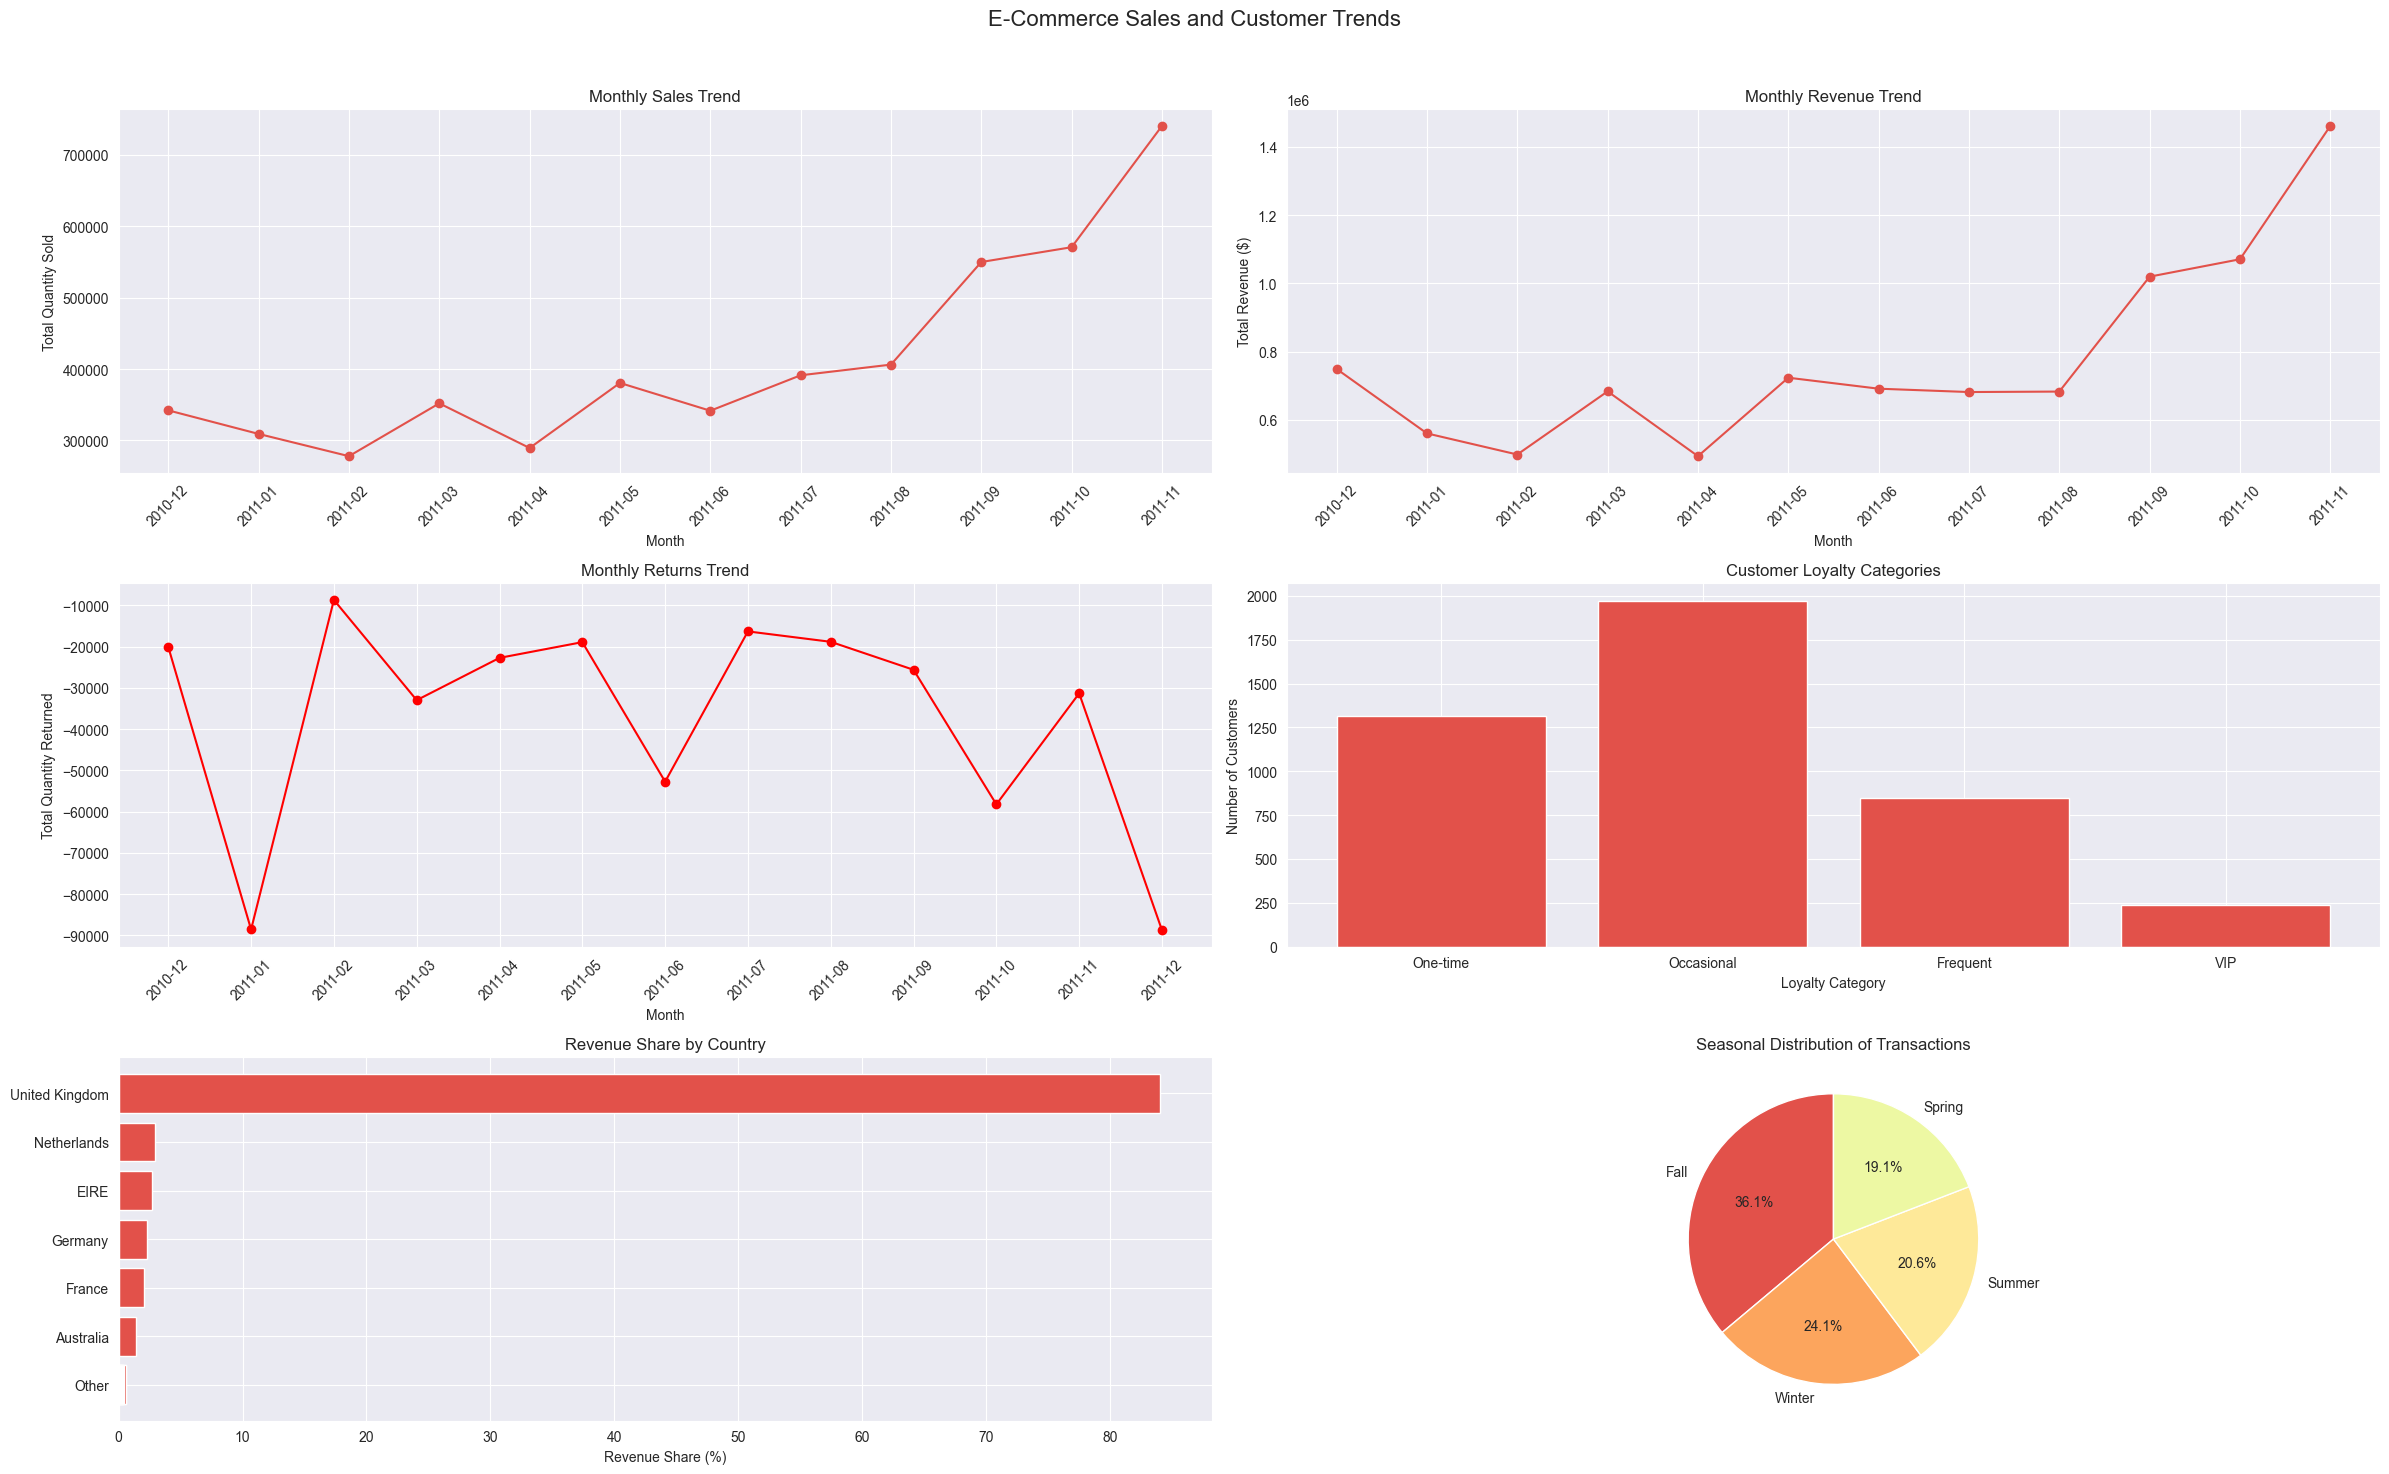

In [6]:
# Set up subplots for clear visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 15))
fig.suptitle("E-Commerce Sales and Customer Trends", fontsize=16)

# 1. Monthly Sales Trend
axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales, marker='o', linestyle='-')
axes[0, 0].set_title("Monthly Sales Trend")
axes[0, 0].set_ylabel("Total Quantity Sold")
axes[0, 0].set_xlabel("Month")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Monthly Returns Trend (New)
axes[1, 0].plot(monthly_returns.index.astype(str), monthly_returns, marker='o', linestyle='-', color='red')
axes[1, 0].set_title("Monthly Returns Trend")
axes[1, 0].set_ylabel("Total Quantity Returned")
axes[1, 0].set_xlabel("Month")
axes[1, 0].tick_params(axis='x', rotation=45)

# 3. Monthly Revenue Trend
axes[0, 1].plot(monthly_revenue.index.astype(str), monthly_revenue, marker='o', linestyle='-')
axes[0, 1].set_title("Monthly Revenue Trend")
axes[0, 1].set_ylabel("Total Revenue ($)")
axes[0, 1].set_xlabel("Month")
axes[0, 1].tick_params(axis='x', rotation=45)

# 4. Customer Loyalty Categories (Bar Chart)
loyalty_counts = customer_summary["LoyaltyCategory"].value_counts().reindex(["One-time", "Occasional", "Frequent", "VIP"], fill_value=0)
axes[1, 1].bar(loyalty_counts.index, loyalty_counts.values)
axes[1, 1].set_title("Customer Loyalty Categories")
axes[1, 1].set_ylabel("Number of Customers")
axes[1, 1].set_xlabel("Loyalty Category")

# 5. Revenue Share by Country (Bar Chart)
sorted_revenue = country_revenue.sort_values("RevenueShare", ascending=False)
axes[2, 0].barh(sorted_revenue["Country"], sorted_revenue["RevenueShare"] * 100)
axes[2, 0].set_title("Revenue Share by Country")
axes[2, 0].set_xlabel("Revenue Share (%)")
axes[2, 0].invert_yaxis()

# 6. Seasonal Distribution of Transactions (Pie Chart)
season_counts = df["Season"].value_counts()
axes[2, 1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title("Seasonal Distribution of Transactions")

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


## **Findings & Analysis**  

This analysis focuses on understanding **which countries contribute the most to total revenue** and **whether seasonal trends influence customer spending**. Through data-driven visualizations, we can uncover patterns that help businesses optimize their strategies.

### **1. Revenue Contribution by Country**  

The **bar chart of revenue share by country** highlights a significant disparity in sales distribution across different regions:  

- **The United Kingdom dominates revenue**, contributing the vast majority of sales.  
- Other notable contributors include **the Netherlands, Ireland (IRE), Germany, France, and Australia**, but their revenue shares are significantly lower.  
- **Smaller markets were consolidated into an "Other" category**, indicating that many countries generate minimal revenue individually.  

#### **Key Implications:**  
- **Market Expansion:** Businesses looking to scale may consider **targeted regional marketing campaigns** in underperforming markets.  
- **Localization Strategies:** Given the dominance of the UK, **localized promotions, currency adjustments, and regional partnerships** could enhance sales in other countries.  
- **Customer Focus:** Since the UK is the primary market, customer retention strategies (loyalty programs, exclusive discounts) should focus on this region.  

---

### **2. Seasonal Shopping Behavior**  

The **seasonal distribution of transactions (pie chart)** provides insights into how customer spending fluctuates throughout the year:  

- **Fall (36.1%) and Winter (24.1%) drive the highest transaction volumes**, suggesting a surge in purchases toward the end of the year.  
- **Spring (19.1%) and Summer (20.6%) exhibit lower transaction activity**, indicating these are slower retail periods.  

#### **Key Implications:**  
- **Holiday Sales Impact:** The higher transaction volumes in **Fall and Winter align with major shopping events**, such as Black Friday and Christmas. Businesses should **prepare inventory, optimize advertising, and plan promotions well in advance**.  
- **Off-Peak Strategies:** Since Spring and Summer see fewer transactions, **retailers can implement targeted discounts or promotional campaigns to stimulate demand during these months**.  
- **Inventory Planning:** Seasonal insights help in **stocking the right products at the right time**, preventing overstocking in low-demand periods and shortages during peak seasons.  

---

#### **Conclusion**  

The analysis reveals two crucial findings:  

1. **Revenue is highly concentrated in the UK**, with other countries playing a minor role.  
2. **Customer spending is heavily influenced by seasonality**, with peak activity in Fall and Winter, aligning with major shopping periods.  

# Customer Segmentation & Behavior Analysis
